In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#EDA Process
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.shape

(398, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


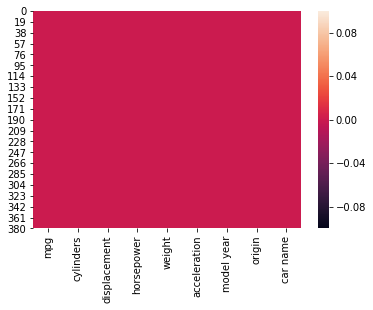

In [10]:
import seaborn as sns
sns.heatmap(df.isnull())

In [12]:
df = pd.DataFrame(data=df)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [13]:
#Finding the unique values
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [14]:
#all values of car name are unique and it will useful to predict the output so I am deleting this column
df.drop(['car name'],axis=1,inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [15]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [16]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [17]:
df['horsepower'].mode()

0    150
dtype: object

In [19]:
#Object into Integer using encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df1=le.fit_transform(df['horsepower'])
df1

array([15, 33, 27, 27, 22, 40, 45, 44, 46, 38, 35, 32, 27, 46, 89, 89, 91,
       79, 82, 48, 81, 84, 89,  8, 84, 44, 41, 43, 39, 82, 84, 89, 93,  0,
        3,  0, 82,  0, 33, 36, 29, 27, 37, 35, 36,  6, 67,  0, 82, 80, 84,
       65, 70, 60, 64, 55, 65, 89, 74, 53, 84, 80, 33, 36, 27, 29, 27, 42,
       30, 32, 38, 91, 27, 15, 22, 27,  7, 70, 81, 64, 80, 86, 91, 74, 82,
       36, 27, 24, 19, 27, 40, 27, 31, 27, 44, 46, 36,  3,  0,  0, 82, 89,
       48, 27, 34, 35, 37,  0, 82, 67, 88, 84, 79,  4, 84, 24, 47, 50, 69,
       85,  7, 27,  6, 12, 37, 89, 93,  0,  0, 62, 74, 60, 69,  0,  6,  3,
       22, 27, 27, 22, 27, 77, 62, 72, 51, 56, 69, 69, 69, 91, 87, 62, 89,
        3, 67, 67, 35, 24, 27, 25,  6,  3,  6, 89,  6,  6, 14, 69, 77,  0,
       72, 90, 66, 91, 91, 65, 84, 89, 82, 92,  9, 52, 80, 75, 86, 73, 77,
       22, 27, 11, 28,  0,  3, 75, 84, 51, 55, 65, 52,  0, 72,  6, 89, 66,
       65, 69, 67,  1, 27, 82,  5, 11, 37, 24, 15, 27, 63, 74, 54, 90, 65,
       24,  6, 24, 15,  6

In [20]:
df['horsepower']=df1

In [21]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [22]:
#Replacing 0 with Median value
df['horsepower'].replace(0,df['horsepower'].median(),inplace=True)
df['horsepower'].unique()

array([15, 33, 27, 22, 40, 45, 44, 46, 38, 35, 32, 89, 91, 79, 82, 48, 81,
       84,  8, 41, 43, 39, 93, 60,  3, 36, 29, 37,  6, 67, 80, 65, 70, 64,
       55, 74, 53, 42, 30,  7, 86, 24, 19, 31, 34, 88,  4, 47, 50, 69, 85,
       12, 62, 77, 72, 51, 56, 87, 25, 14, 90, 66, 92,  9, 52, 75, 73, 11,
       28,  1,  5, 63, 54, 26, 83, 58, 49, 61, 21,  2, 13, 17, 20, 18, 23,
       71, 57, 16, 78, 59, 68, 10, 76], dtype=int64)

In [23]:
dfcorr = df.corr()
dfcorr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,0.437468,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,-0.602866,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,-0.524398,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.437468,-0.602866,-0.524398,1.000000,-0.527546,0.318318,0.120954,0.268293
weight,-0.831741,0.896017,0.932824,-0.527546,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,0.318318,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,0.120954,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,0.268293,-0.581024,0.205873,0.180662,1.000000


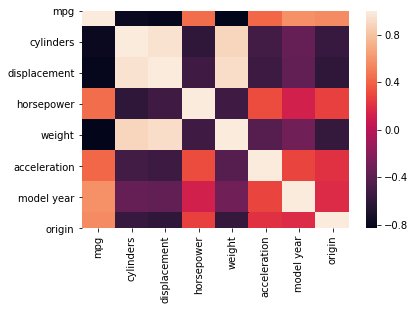

In [24]:
sns.heatmap(dfcorr)

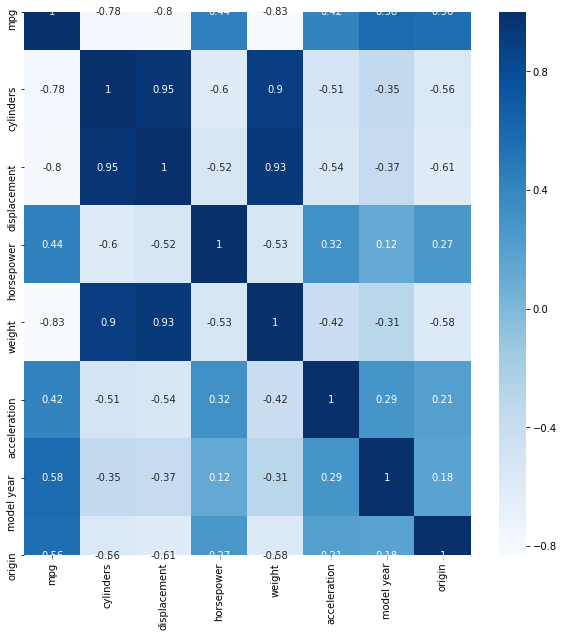

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

In [27]:
#finding the skewness of the dataset

df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower     -0.402872
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [28]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.228886
horsepower     -0.402872
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.796540
dtype: float64

In [29]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (398, 8)
df1.shape: (396, 8)
z value is: [[0.7064387  1.49819126 1.13790863 ... 1.29549834 1.62742629 0.73561335]
 [1.09075062 1.49819126 1.38569114 ... 1.47703779 1.62742629 0.73561335]
 [0.7064387  1.49819126 1.20444204 ... 1.65857724 1.62742629 0.73561335]
 ...
 [1.08701694 0.85632057 0.41197327 ... 1.4407299  1.62198339 0.73561335]
 [0.57460104 0.85632057 0.63354897 ... 1.10082237 1.62198339 0.73561335]
 [0.95891297 0.85632057 0.64928356 ... 1.39128549 1.62198339 0.73561335]]


In [30]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

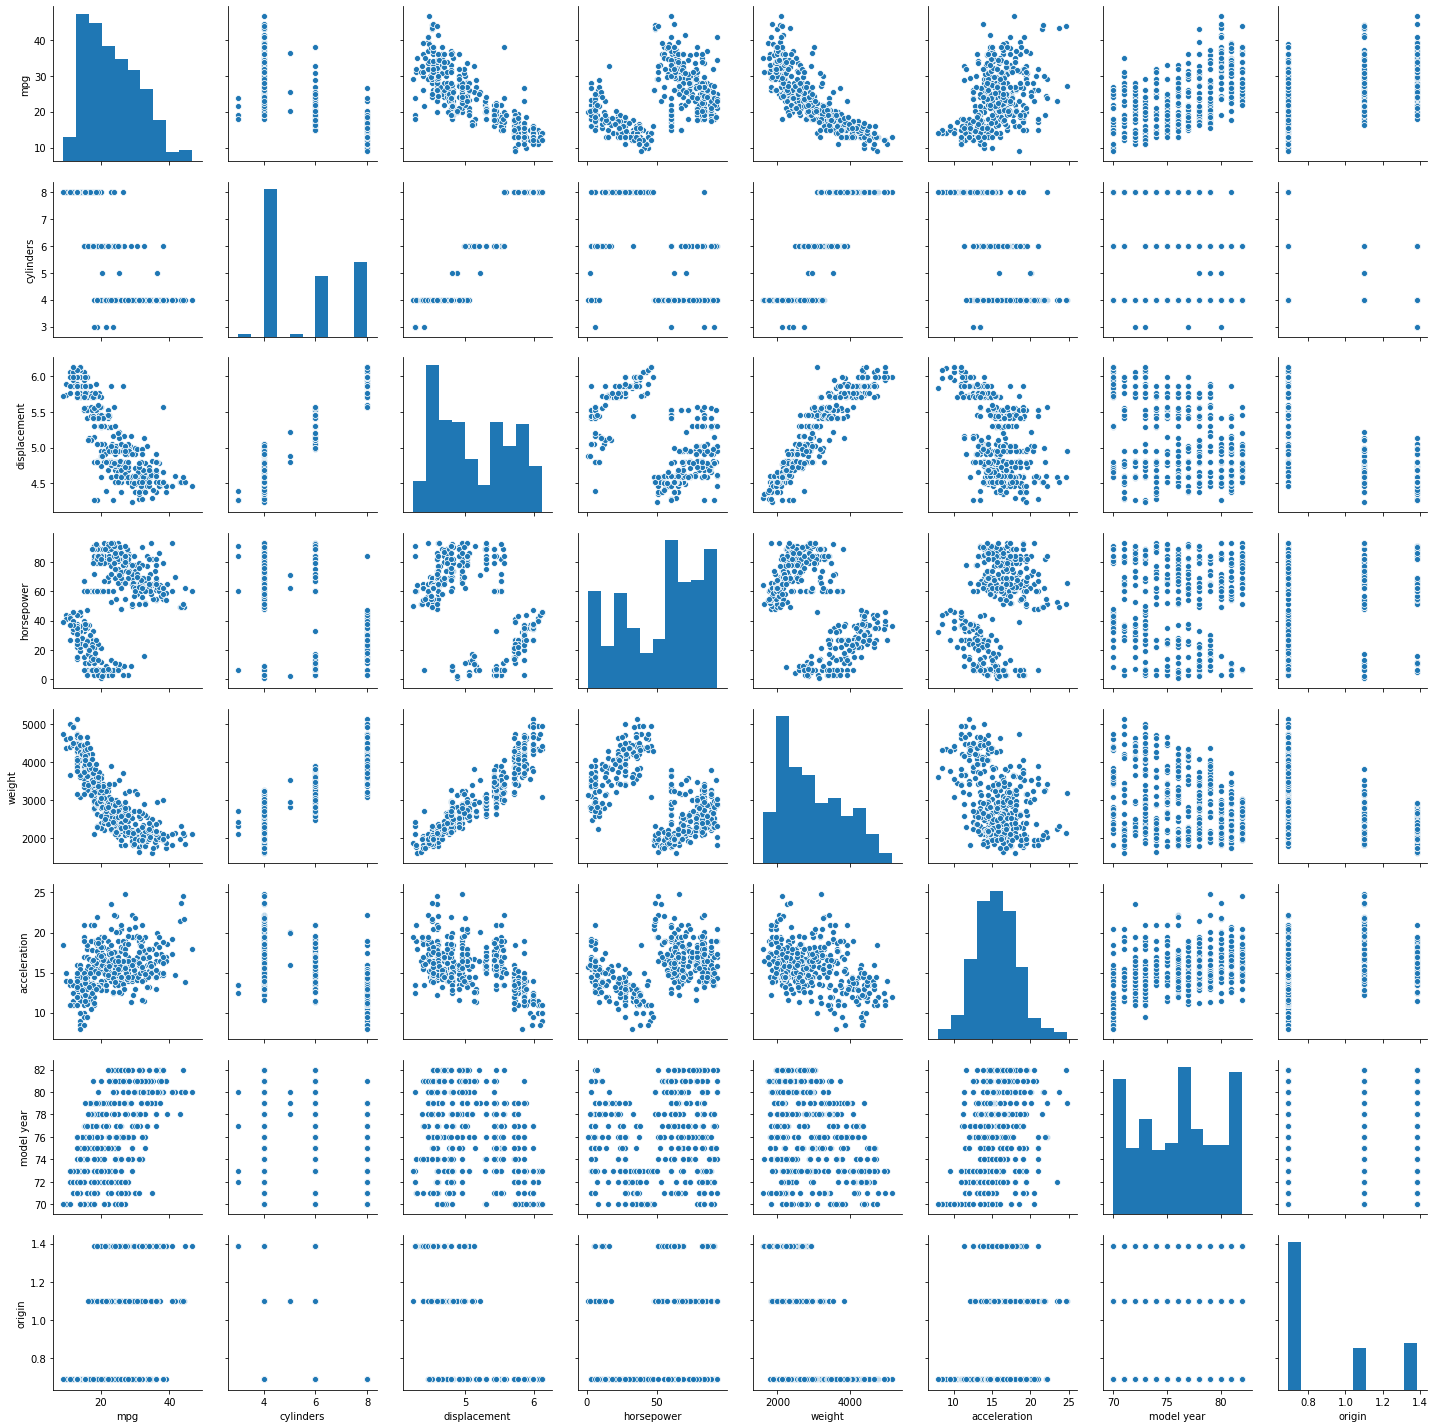

In [31]:
sns.pairplot(df)

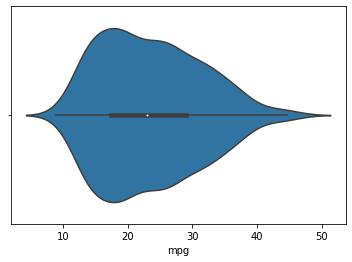

In [33]:
#violin plot representation with respect to each column

sns.violinplot(x="mpg",data=df)

In [ ]:
#violin plot representation with respect to each column

sns.violinplot(x="cylinders",data=df)

In [35]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

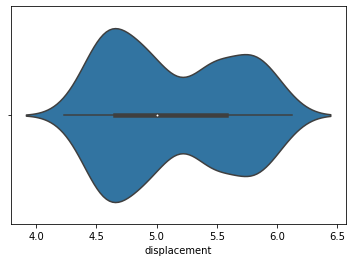

In [36]:
sns.violinplot(x="displacement",data=df)

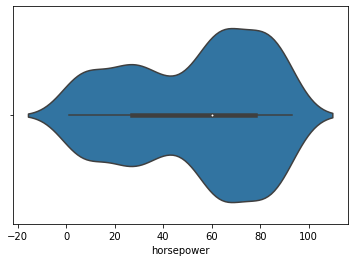

In [37]:
sns.violinplot(x="horsepower",data=df)

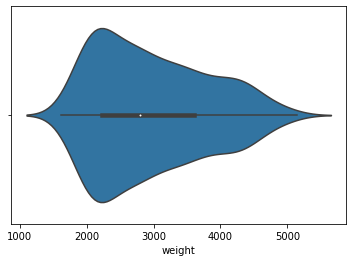

In [38]:
sns.violinplot(x="weight",data=df)

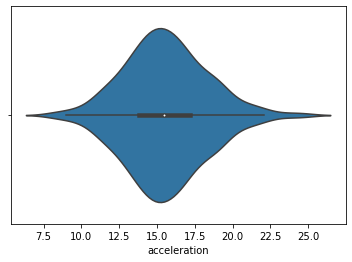

In [39]:
sns.violinplot(x="acceleration",data=df)

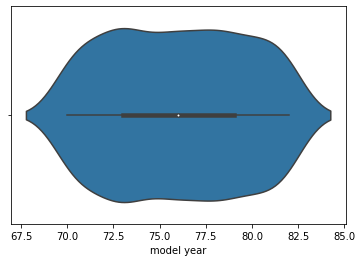

In [40]:
sns.violinplot(x="model year",data=df)

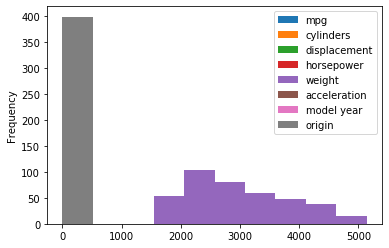

In [41]:
df.plot.hist()

In [ ]:
#Lets check the how age is changing with respect to income
sns.lineplot(df["cylinders"],df["mpg"])
plt.show()

In [42]:
df.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

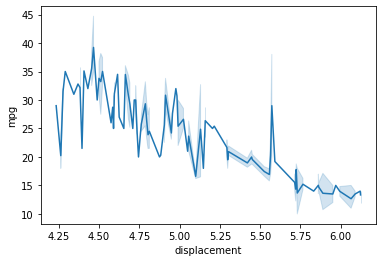

In [43]:
sns.lineplot(df["displacement"],df["mpg"])
plt.show()

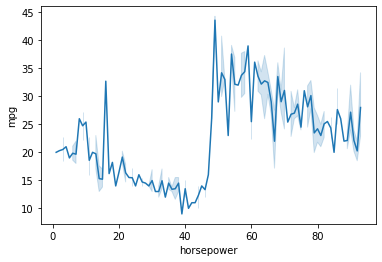

In [44]:
sns.lineplot(df["horsepower"],df["mpg"])
plt.show()

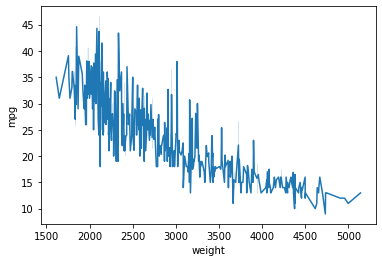

In [45]:
sns.lineplot(df["weight"],df["mpg"])
plt.show()

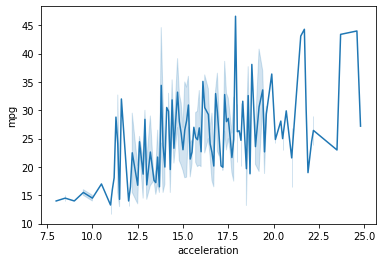

In [46]:
sns.lineplot(df["acceleration"],df["mpg"])
plt.show()

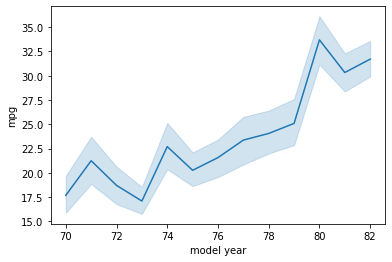

In [47]:
sns.lineplot(df["model year"],df["mpg"])
plt.show()

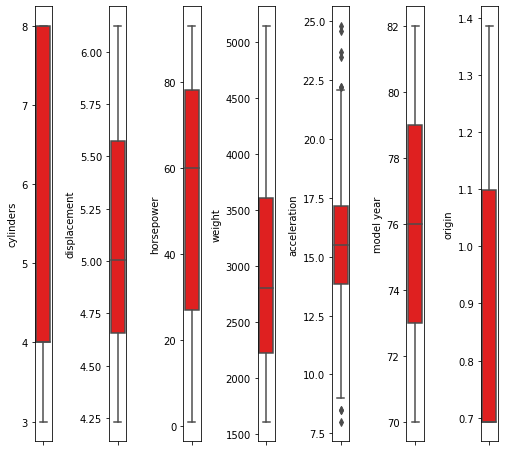

In [48]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

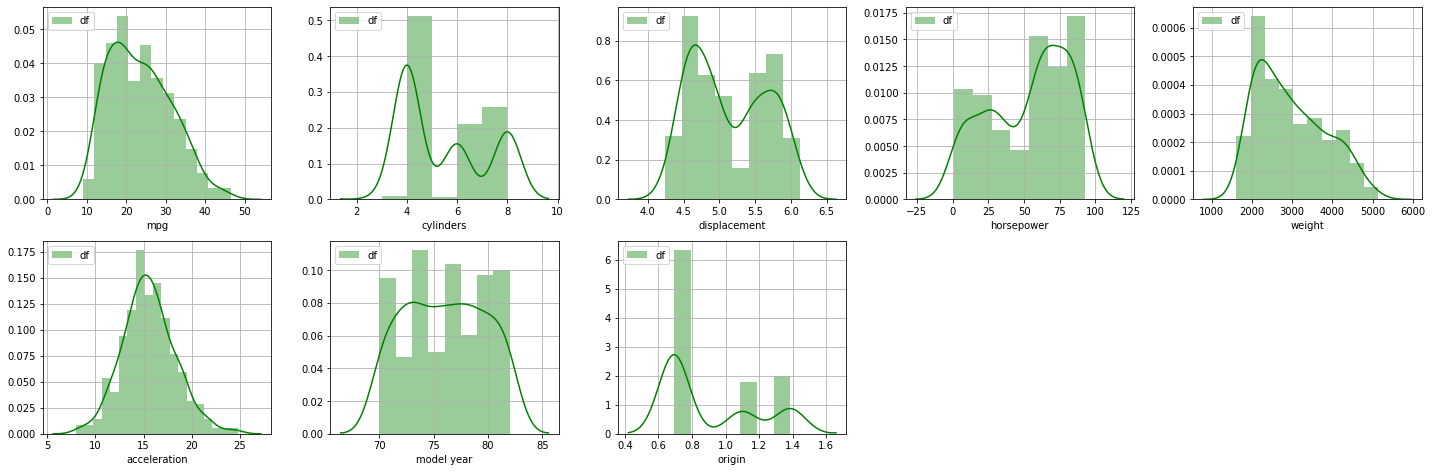

In [49]:
#displot through the iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

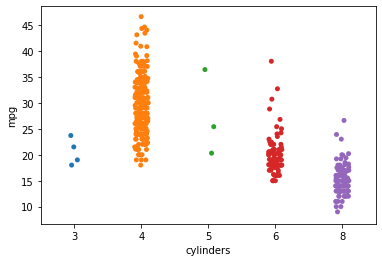

In [51]:
ax=sns.stripplot(x='cylinders',y="mpg",data=df);



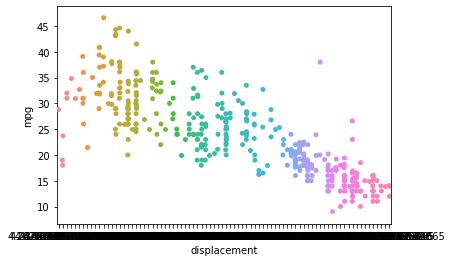

In [52]:
ax=sns.stripplot(x='displacement',y="mpg",data=df);

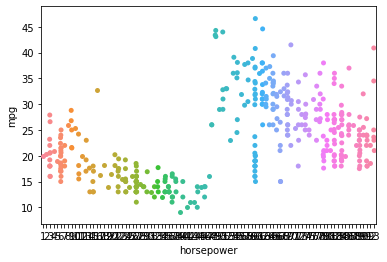

In [53]:
ax=sns.stripplot(x='horsepower',y="mpg",data=df);

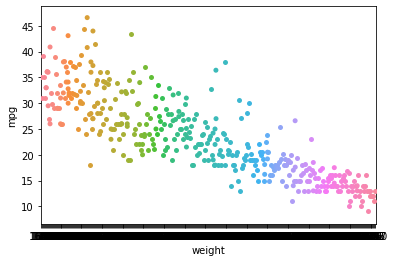

In [54]:
ax=sns.stripplot(x='weight',y="mpg",data=df);

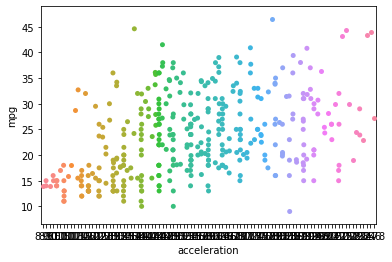

In [56]:
ax=sns.stripplot(x='acceleration',y="mpg",data=df);

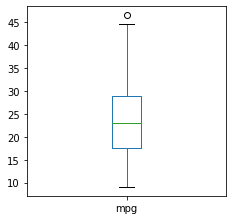

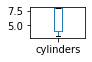

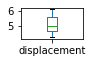

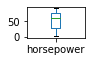

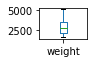

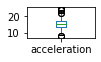

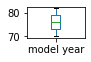

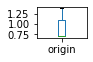

In [58]:
#boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

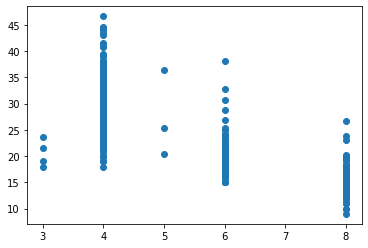

In [59]:
#Scatter plot representation
plt.scatter(df["cylinders"],df["mpg"])

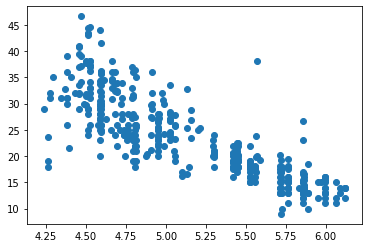

In [62]:
#df.keys()
plt.scatter(df["displacement"],df["mpg"])

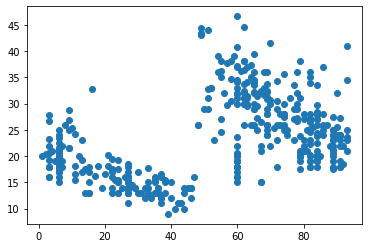

In [63]:
plt.scatter(df["horsepower"],df["mpg"])

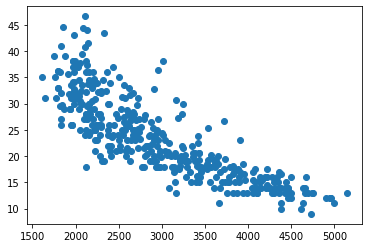

In [64]:
plt.scatter(df["weight"],df["mpg"])

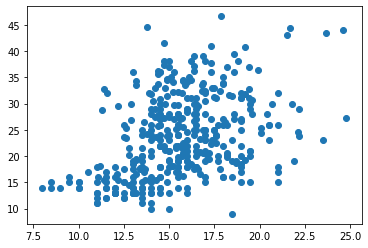

In [65]:
plt.scatter(df["acceleration"],df["mpg"])

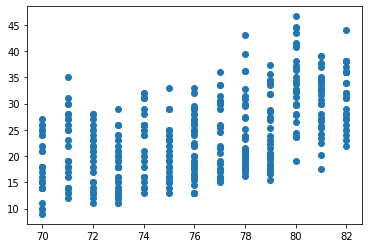

In [66]:
plt.scatter(df["model year"],df["mpg"])

In [67]:
#Separating X and Y Variable to predict the dataset

X = df.drop("mpg", axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,5.730100,15,3504,12.0,70,0.693147
1,8,5.860786,33,3693,11.5,70,0.693147
2,8,5.765191,27,3436,11.0,70,0.693147
3,8,5.720312,27,3433,12.0,70,0.693147
4,8,5.713733,22,3449,10.5,70,0.693147
...,...,...,...,...,...,...,...
393,4,4.948760,80,2790,15.6,82,0.693147
394,4,4.584967,51,2130,24.6,82,1.098612
395,4,4.912655,78,2295,11.6,82,0.693147
396,4,4.795791,73,2625,18.6,82,0.693147


In [68]:
Y = df["mpg"]
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [69]:
X.shape

(398, 7)

In [70]:
Y.shape

(398,)

In [71]:
Y = Y.values.reshape(-1,1)
Y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

In [72]:
Y.shape

(398, 1)

In [73]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=38)

In [74]:
train_X.shape

(310, 7)

In [75]:
train_Y.shape

(310, 1)

In [76]:
test_X.shape

(88, 7)

In [77]:
test_Y.shape

(88, 1)

In [81]:
#Applying the Linear regression Model


lg= LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lg.coef_

array([[ 1.17950892e+00, -6.56823396e+00,  1.36994754e-02,
        -4.43179397e-03,  1.86505512e-02,  7.30184000e-01,
         1.60734966e+00]])

In [84]:
lg.intercept_

array([5.96839453])

In [85]:
lg.score(train_X,train_Y)

0.8315135384753906

In [86]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result :",pred)
print("actual result",test_Y)

Predicted result : [[29.02974229]
 [32.41654213]
 [16.26675324]
 [11.53892036]
 [25.01944076]
 [30.15481193]
 [18.73051978]
 [25.43421214]
 [15.83031738]
 [15.74634279]
 [12.72409913]
 [24.96952549]
 [19.93528323]
 [21.73947674]
 [28.687968  ]
 [27.99936921]
 [30.09031236]
 [19.89231578]
 [15.64385481]
 [20.83141695]
 [18.92673292]
 [25.47291366]
 [ 8.93760582]
 [28.5356636 ]
 [23.34266486]
 [33.56986606]
 [27.76113223]
 [36.36901858]
 [23.85696587]
 [34.7237934 ]
 [31.66219266]
 [26.13406934]
 [32.67539941]
 [20.35700688]
 [26.45938997]
 [22.23648937]
 [26.55210377]
 [16.0677842 ]
 [20.83947571]
 [11.0056739 ]
 [ 8.50158253]
 [24.74225808]
 [18.6746783 ]
 [11.2624509 ]
 [27.018954  ]
 [33.90118861]
 [13.89229563]
 [24.14130159]
 [31.39800568]
 [21.96145537]
 [20.08391673]
 [20.12450606]
 [26.51792009]
 [27.57028128]
 [23.54647566]
 [21.32581173]
 [34.13877895]
 [21.65678725]
 [17.11231268]
 [34.5371709 ]
 [30.55497074]
 [28.54275699]
 [26.59668368]
 [31.93501869]
 [24.01699113]
 [ 9.6

In [87]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 2.5007124305699566
Mean sqaured error: 12.26941415522765
Root mean squared error: 3.5027723527554073


In [88]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.9781696454373066
Mean squared error: 12.64
R2 Score: 0.80


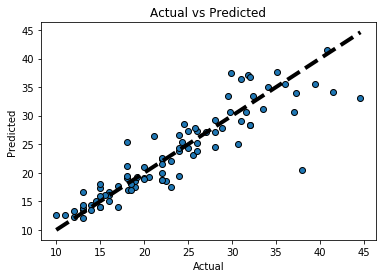

In [91]:
#Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_title("Actual vs Predicted")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

In [92]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [94]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.8414095282168873
r2 score corresponding to  43 is 0.8349497545956075
r2 score corresponding to  44 is 0.8439371851668676
r2 score corresponding to  45 is 0.8293332288415124
r2 score corresponding to  46 is 0.8429869448055848
r2 score corresponding to  47 is 0.8239473746592296
r2 score corresponding to  48 is 0.8037892926746649
r2 score corresponding to  49 is 0.8539969087675883
r2 score corresponding to  50 is 0.8201895449591308
r2 score corresponding to  51 is 0.812214091111898
r2 score corresponding to  52 is 0.7850577755686428
r2 score corresponding to  53 is 0.8092545558885673
r2 score corresponding to  54 is 0.7491443486168194
r2 score corresponding to  55 is 0.8578722154579801
r2 score corresponding to  56 is 0.8375597651357398
r2 score corresponding to  57 is 0.7840848888119274
r2 score corresponding to  58 is 0.8577495064982097
r2 score corresponding to  59 is 0.7942230087707381
r2 score corresponding to  60 is 0.8225563615249479
r2 score corr

In [103]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6832435546701205
std deviation in r2 score for ada boosting Regression:  0.20341703905147698


In [95]:
#KNN Model used to predict
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear : %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear : 15.68
R2 Score of linear svc: 0.77


In [98]:
#use grid_search to find optimal value of n_neighbors for KNN Model
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=20)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 5}

In [100]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=5)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.7733602196816299
r2 score corresponding to  43 is 0.627256302225111
r2 score corresponding to  44 is 0.7239314383941167
r2 score corresponding to  45 is 0.5945325742368799
r2 score corresponding to  46 is 0.6805694073783921
r2 score corresponding to  47 is 0.5921646762742485
r2 score corresponding to  48 is 0.7884036860500707
r2 score corresponding to  49 is 0.7151133357029342
r2 score corresponding to  50 is 0.7168316742027225
r2 score corresponding to  51 is 0.7288561988642505
r2 score corresponding to  52 is 0.5939703955019138
r2 score corresponding to  53 is 0.6762133703427619
r2 score corresponding to  54 is 0.5341793702584963
r2 score corresponding to  55 is 0.7671088910907103
r2 score corresponding to  56 is 0.7189318631598507
r2 score corresponding to  57 is 0.676222769100252
r2 score corresponding to  58 is 0.7482862875865046
r2 score corresponding to  59 is 0.7564234875277249
r2 score corresponding to  60 is 0.6262686758269191
r2 score corre

In [102]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.591067256144391
std deviation in r2 scorefor Linear Regression: 0.2255974297343332

Mean r2 score for KNN Regression:  0.32833266211782214
std deviation in r2 score for KNN Regression: 0.5586389821489098


In [104]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6992753551675651
std deviation in r2 score for ada boosting Regression:  0.201815258211982


In [105]:
#check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.01}

In [107]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.5938683707003317
std deviation in r2 score for Lasso Regression:  0.2231110191147372


In [108]:
#boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7046054553861973
std deviation in r2 score for ada boosting Regression:  0.18780410990148055


In [109]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 9.88
R2 Score of linear svc: 0.85


In [111]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ad_reg4=AdaBoostRegressor()
add_reg4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ad_reg4,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ad_reg4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6873830013833333
std deviation in r2 score for ada boosting Regression:  0.19665122915077404


In [124]:
#Decision Tree Regresso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtr = DecisionTreeRegressor(random_state = 0)  
  
 
dtr.fit(X, Y) 

dtr.score(train_X,train_Y)
y_pred4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [125]:
#Decision Tree Regressor Using GridSearchCv
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.8761961999139452
R-Squaredon test dataset=0.9404015326346873


In [127]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                      

In [128]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.5936120629452445
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [129]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
add_reg=AdaBoostRegressor(base_estimator=dtm,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6617435079492159
std deviation in r2 score for ada boosting Regression:  0.29126872407875987


In [130]:
##All models,dtr gives the Highest r2 score(1) and mean squared error is zero 
#so we are going to save this mode

In [131]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 15_Auto_MGP_prediction.csv')

In [132]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtr,'Auto_mpg.pkl')

['Auto_mpg.pkl']